# 3 Pointers Made against shooting.xlsx

### Import packages

In [42]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from scipy.stats import pearsonr

### Set working directory

In [3]:
# Print working directory
cwd = os.getcwd()
print(f'Directory: {cwd}')

# Change working directory
os.chdir('/Users/tyler/OneDrive/Documents/Python/NBA')

# Print working directory
cwd = os.getcwd()
print(f'Directory: {cwd}')

Directory: C:\Users\tyler\OneDrive\Documents\Python\NBA\backend\analysis
Directory: C:\Users\tyler\OneDrive\Documents\Python\NBA


## Exploratory Data Analysis

### Import data

In [4]:
df = pd.read_csv('backend/data/shooting.csv').drop(['Unnamed: 0'], axis=1)

### Basic exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194138 entries, 0 to 194137
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      194138 non-null  object 
 1   visitor   194138 non-null  object 
 2   home      194138 non-null  object 
 3   team      194138 non-null  int64  
 4   quarter   194138 non-null  object 
 5   fg        194138 non-null  int64  
 6   fga       194138 non-null  int64  
 7   fg_perc   194138 non-null  float64
 8   2p        194138 non-null  int64  
 9   2pa       194138 non-null  int64  
 10  2p_perc   194135 non-null  float64
 11  3p        194138 non-null  int64  
 12  3pa       194138 non-null  int64  
 13  3p_perc   192676 non-null  float64
 14  efg_perc  194138 non-null  float64
 15  ast       194138 non-null  int64  
 16  ast_perc  194116 non-null  float64
dtypes: float64(5), int64(8), object(4)
memory usage: 25.2+ MB


In [9]:
df.sample(5)

,date,visitor,home,team,quarter,fg,fga,fg_perc,2p,2pa,2p_perc,3p,3pa,3p_perc,efg_perc,ast,ast_perc
193627,"Tue, Jun 1, 2021",Los Angeles Lakers,Phoenix Suns,0,q2,2,17,0.118,2,12,0.167,0,5,0.000,0.118,0,0.000
60977,"Mon, Feb 7, 2011",Utah Jazz,Sacramento Kings,1,total,38,81,0.469,32,66,0.485,6,15,0.400,0.506,18,0.474
141111,"Wed, Mar 15, 2017",Portland Trail Blazers,San Antonio Spurs,0,q2,9,19,0.474,7,14,0.500,2,5,0.400,0.526,4,0.444
87843,"Thu, Mar 21, 2013",Minnesota Timberwolves,Sacramento Kings,1,q3,10,15,0.667,7,11,0.636,3,4,0.750,0.767,6,0.600
131193,"Sat, Oct 29, 2016",Brooklyn Nets,Milwaukee Bucks,1,total,41,88,0.466,33,66,0.500,8,22,0.364,0.511,25,0.610


In [10]:
# Convert 'date' column to Date object
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194138 entries, 0 to 194137
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      194138 non-null  datetime64[ns]
 1   visitor   194138 non-null  object        
 2   home      194138 non-null  object        
 3   team      194138 non-null  int64         
 4   quarter   194138 non-null  object        
 5   fg        194138 non-null  int64         
 6   fga       194138 non-null  int64         
 7   fg_perc   194138 non-null  float64       
 8   2p        194138 non-null  int64         
 9   2pa       194138 non-null  int64         
 10  2p_perc   194135 non-null  float64       
 11  3p        194138 non-null  int64         
 12  3pa       194138 non-null  int64         
 13  3p_perc   192676 non-null  float64       
 14  efg_perc  194138 non-null  float64       
 15  ast       194138 non-null  int64         
 16  ast_perc  194116 non-null  float64    

In [21]:
total_df = df[df['quarter'] == 'total']
q1_df = df[df['quarter'] == 'q1']
q2_df = df[df['quarter'] == 'q2']
q3_df = df[df['quarter'] == 'q3']
q4_df = df[df['quarter'] == 'q4']

In [22]:
total_df.describe()

,team,fg,fga,fg_perc,2p,2pa,2p_perc,3p,3pa,3p_perc,efg_perc,ast,ast_perc,year,month
count,38288.000000,38288.000000,38288.000000,38288.000000,38288.000000,38288.000000,38288.000000,38288.000000,38288.000000,38288.000000,38288.000000,38288.000000,38288.000000,38288.000000,38288.000000
mean,0.500000,38.172221,83.623668,0.457423,29.784162,60.181702,0.497631,8.388059,23.441966,0.354940,0.507396,22.242661,0.581559,2013.582167,5.590002
std,0.500007,5.319873,7.825163,0.055732,5.227867,8.949548,0.069839,4.004269,8.733771,0.107226,0.066277,5.209339,0.103574,4.325710,4.310311
min,0.000000,16.000000,54.000000,0.246000,7.000000,25.000000,0.226000,0.000000,1.000000,0.000000,0.267000,4.000000,0.163000,2006.000000,1.000000
25%,0.000000,35.000000,78.000000,0.419000,26.000000,54.000000,0.450000,5.000000,17.000000,0.286000,0.462000,19.000000,0.513000,2010.000000,2.000000
50%,0.500000,38.000000,83.000000,0.457000,30.000000,60.000000,0.500000,8.000000,22.000000,0.353000,0.506000,22.000000,0.583000,2014.000000,4.000000
75%,1.000000,42.000000,89.000000,0.494000,33.000000,66.000000,0.543000,11.000000,29.000000,0.423000,0.551000,26.000000,0.652000,2017.000000,11.000000
max,1.000000,63.000000,129.000000,0.684000,57.000000,113.000000,0.800000,29.000000,70.000000,1.000000,0.779000,50.000000,0.966000,2021.000000,12.000000


### 3 Pointer's Made vs Year (--)

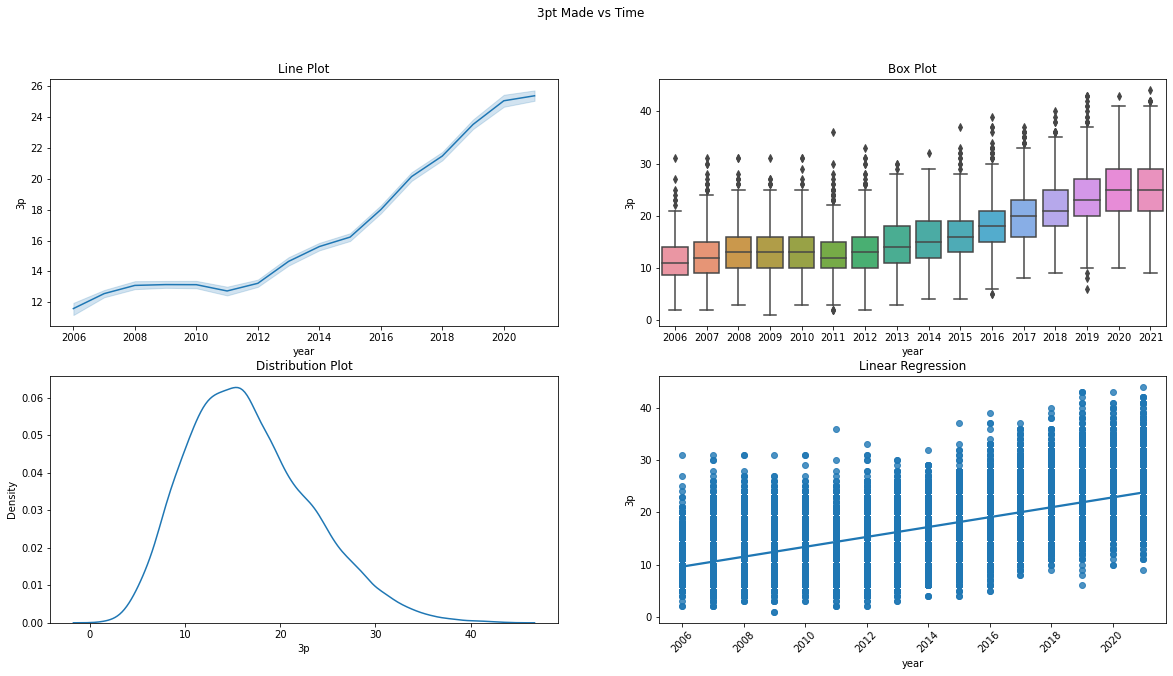

In [27]:
# Groupby and sum all statistics
totals = total_df.groupby(
    ['date', 'visitor', 'home']).aggregate(
    {'team': ['sum'], 'fg': ['sum'], 'fga': ['sum'], 'fg_perc': ['sum'], '2p': ['sum'], '2pa': ['sum'], '2p_perc': ['sum'], 
     '3p': ['sum'], '3pa': ['sum'], '3p_perc': ['sum'], 'efg_perc': ['sum'], 'ast': ['sum'], 'ast_perc': ['sum'], 
     'year': ['min'], 'month': ['min']})
totals.columns = [col[0] for col in totals.columns.to_flat_index()]

# Change plot size
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('3pt Made vs Time')
fig = plt.gcf()

# Plot lineplot of Total 3pt Made over Time
chart = sns.lineplot(x='year', y='3p', data=totals, ax= ax[0, 0]).set(title='Line Plot')

# Plot boxplot of Total 3pt Made over Time
chart = sns.boxplot(x='year', y='3p', data=totals, ax=ax[0, 1]).set(title= 'Box Plot')
plt.xticks(rotation=45)

# Plot distribution plot of Total 3pt Made over Time
chart = sns.kdeplot(x='3p', data=totals, ax=ax[1,0]).set(title='Distribution Plot')

# Plot linearregression of Total 3pt Made over Time
chart = sns.regplot(x='year', y='3p', data=totals, ax=ax[1, 1]).set(title='Linear Regression')

plt.show()

### 3 Pointer's Made vs Year (2015 - current)

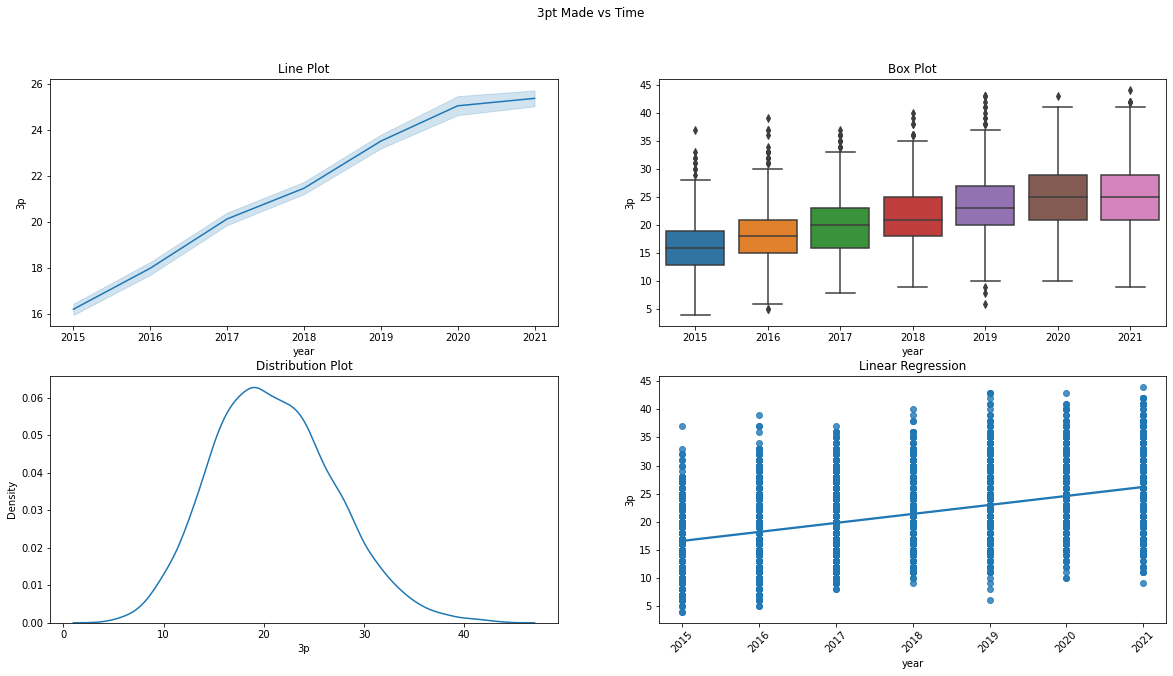

In [45]:
# Change plot size
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('3pt Made vs Time')
fig = plt.gcf()

year = 2015

# Plot lineplot of Total 3pt Made over Time
chart = sns.lineplot(x='year', y='3p', data=totals[totals['year'] >= year], ax= ax[0, 0]).set(title='Line Plot')

# Plot boxplot of Total 3pt Made over Time
chart = sns.boxplot(x='year', y='3p', data=totals[totals['year'] >= year], ax=ax[0, 1]).set(title= 'Box Plot')
plt.xticks(rotation=45)

# Plot distribution plot of Total 3pt Made over Time
chart = sns.kdeplot(x='3p', data=totals[totals['year'] >= year], ax=ax[1,0]).set(title='Distribution Plot')

# Plot linearregression of Total 3pt Made over Time
chart = sns.regplot(x='year', y='3p', data=totals[totals['year'] >= year], ax=ax[1, 1]).set(title='Linear Regression')

plt.xticks(rotation=45)
plt.show()

### 3 Pointer's Made vs FGA (2015 - current)

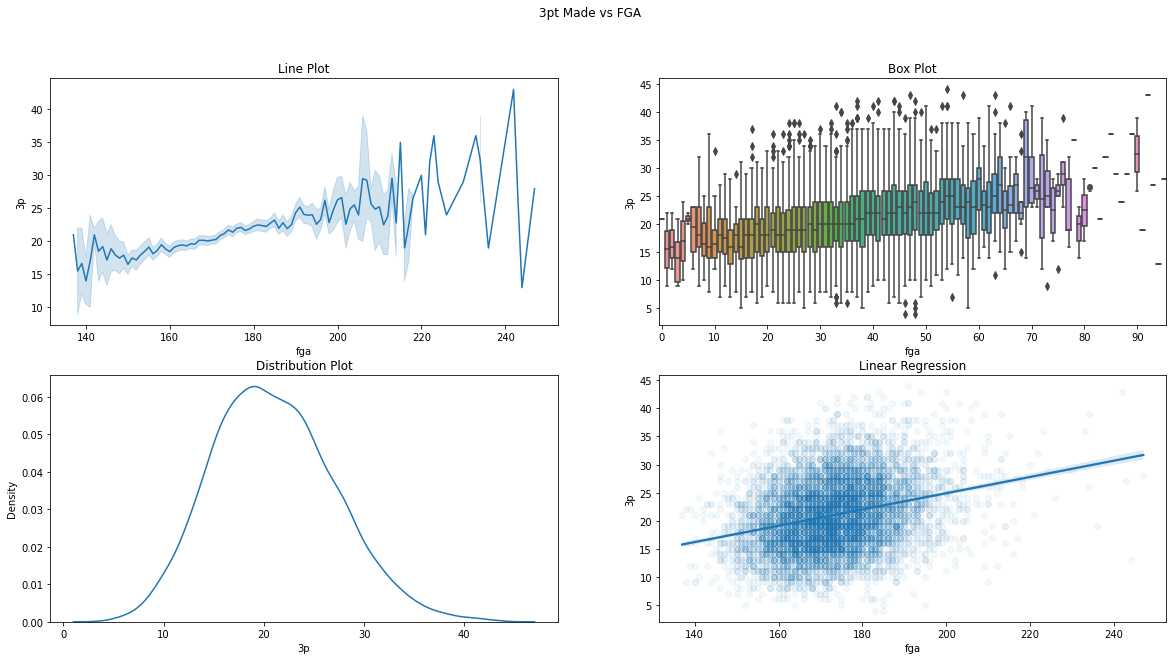

In [46]:
# Change plot size
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('3pt Made vs FGA')
fig = plt.gcf()

year = 2015

# Plot lineplot of Total 3pt Made over FGA
chart = sns.lineplot(x='fga', y='3p', data=totals[totals['year'] >= year], ax= ax[0, 0]).set(title='Line Plot')

# Plot boxplot of Total 3pt Made over FGA
chart = sns.boxplot(x='fga', y='3p', data=totals[totals['year'] >= year], ax=ax[0, 1]).set(title= 'Box Plot')
ax[0, 1].xaxis.set_major_locator(ticker.MultipleLocator(10))
ax[0, 1].xaxis.set_major_formatter(ticker.ScalarFormatter())

# Plot distribution plot of Total 3pt Made over FGA
chart = sns.kdeplot(x='3p', data=totals[totals['year'] >= year], ax=ax[1,0]).set(title='Distribution Plot')

# Plot linearregression of Total 3pt Made over FGA
chart = sns.regplot(x='fga', y='3p', data=totals[totals['year'] >= year], ax=ax[1, 1], scatter_kws={'alpha':0.05}).set(title='Linear Regression')

plt.show()

In [52]:
# Calculate the correlation and significance of the correlation for each stat and 3pts made
for col in totals.columns:
    if col == '3p' or col == 'team' or col == 'year' or col == 'month':
        pass
    else:
        corr_sig = pearsonr(totals['3p'], totals[col])
        print(f'Stat: {col}')
        print(f'\tCorrelation: {corr_sig[0]}')
        print(f'\tP-Value: {corr_sig[1]}')

Stat: fg
	Correlation: 0.48085614388291886
	P-Value: 0.0
Stat: fga
	Correlation: 0.41240686331442966
	P-Value: 0.0
Stat: fg_perc
	Correlation: 0.24911935191957676
	P-Value: 1.1211536467829795e-268
Stat: 2p
	Correlation: -0.30737628257835803
	P-Value: 0.0
Stat: 2pa
	Correlation: -0.5636275473384424
	P-Value: 0.0
Stat: 2p_perc
	Correlation: 0.24794701072851644
	P-Value: 4.299101894509383e-266
Stat: 3pa
	Correlation: 0.8635832006771136
	P-Value: 0.0
Stat: 3p_perc
	Correlation: 0.5351902100423865
	P-Value: 0.0
Stat: efg_perc
	Correlation: 0.5739135358381892
	P-Value: 0.0
Stat: ast
	Correlation: 0.4721333987251032
	P-Value: 0.0
Stat: ast_perc
	Correlation: 0.2210200502496416
	P-Value: 1.7296771223757896e-210
Stat: year
	Correlation: 0.6284651005881583
	P-Value: 0.0
Stat: month
	Correlation: -0.015902518649369514
	P-Value: 0.02778581165206169
